### 1: 必要なライブラリのインポート

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# To show all rows/columns
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [2]:
df_market = pd.read_csv("market.csv", sep=",",encoding="shift-jis")
df_id=pd.read_csv("ID_data.csv", sep=",",encoding="shift-jis")
print(df_id.shape)
print(df_market.shape)

(1000, 3)
(69079, 13)


### 2.各dfを表示

In [3]:
## df_marketを表示
print(df_market.shape)
print(df_market.info())
display(df_market.head())
display(df_market.tail())

(69079, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69079 entries, 0 to 69078
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   レシートNo   69079 non-null  int64 
 1   日        69079 non-null  int64 
 2   時間       69079 non-null  int64 
 3   顧客ID     69079 non-null  int64 
 4   税抜価格     69079 non-null  int64 
 5   税抜単価     69079 non-null  int64 
 6   個数       69079 non-null  int64 
 7   大カテゴリ番号  69079 non-null  int64 
 8   大カテゴリ名   69079 non-null  object
 9   中カテゴリ番号  69079 non-null  int64 
 10  中カテゴリ名   69079 non-null  object
 11  小カテゴリ番号  69079 non-null  int64 
 12  小カテゴリ名   69079 non-null  object
dtypes: int64(10), object(3)
memory usage: 6.9+ MB
None


,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
69074,6998,30,17,1190,80,80,1,11,農産,1113,野菜,111371,大根
69075,6998,30,17,1190,95,95,1,16,加工食品,1614,水物,161412,ところてん
69076,6998,30,17,1190,155,155,1,20,飲料,2013,乳系飲料,201311,牛乳
69077,6998,30,17,1190,165,165,1,13,畜産,1313,精肉加工品,131312,鶏卵
69078,6998,30,17,1190,315,315,1,13,畜産,1315,豚肉,131512,ブランド豚


In [4]:
## df_idを表示
print(df_id.shape)
print(df_id.info())
display(df_id.head())
display(df_id.tail())

(1000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   顧客ID    1000 non-null   int64
 1   性別      1000 non-null   int64
 2   年代      1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None


,顧客ID,性別,年代
0,1001,2,70
1,1002,2,40
2,1003,2,20
3,1004,2,50
4,1005,2,40


,顧客ID,性別,年代
995,1996,2,40
996,1997,2,100
997,1998,2,30
998,1999,2,40
999,2000,0,100


### 3.dfの結合、dfへの代入

In [5]:
df = pd.merge(df_market, df_id, how='left',
              left_on='顧客ID', right_on='顧客ID')
display(df.head())

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名,性別,年代
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋,2,60
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱,2,60
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス,2,60
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト,2,60
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ,1,40


### 4.dfから年代列の値が50のデータのみを抜き出しdf_50へ代入。indexの初期化

In [6]:
df_50 = df[df["年代"]==50].reset_index(drop=True)
print(df_50.shape)
display(df_50.head())

(13684, 15)


,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名,性別,年代
0,17,1,12,1984,110,110,1,19,菓子,1912,ゼリー・プリン,191211,ゼリー,2,50
1,17,1,12,1984,350,350,1,18,惣菜,1813,弁当,181313,米飯惣菜,2,50
2,17,1,12,1984,55,55,1,19,菓子,1916,乾菓子,191620,米菓,2,50
3,17,1,12,1984,85,85,1,20,飲料,2012,清涼飲料,201215,茶系飲料,2,50
4,17,1,12,1984,110,110,1,19,菓子,1915,生菓子,191512,洋風生菓子,2,50


### 5,df_50から列名「個数」と「税抜き価格」のみを抜き出したdfXを作成。

In [7]:
dfX = df_50[["個数", "税抜価格"]]
print(dfX.shape)
display(dfX.head())

(13684, 2)


,個数,税抜価格
0,1,110
1,1,350
2,1,55
3,1,85
4,1,110


### 6.dfXの各列を標準化してX_scaledに代入。平均と簿標準偏差を表示。

In [8]:
X_scaled = scale(dfX)
print(X_scaled.mean(axis=0))
print(X_scaled.std(ddof=0, axis=0))

[9.60613900e-18 1.86930272e-17]
[1. 1.]


In [9]:
print(X_scaled.shape)
print(type(X_scaled))

(13684, 2)
<class 'numpy.ndarray'>


### 8.X_scaledに列ラベルを付与してdfX_scaledを作成。

In [10]:
dfX_scaled = pd.DataFrame(X_scaled, columns=["個数", "税抜価格"])

In [11]:
print(dfX_scaled.info())
display(dfX_scaled.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13684 entries, 0 to 13683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   個数      13684 non-null  float64
 1   税抜価格    13684 non-null  float64
dtypes: float64(2)
memory usage: 213.9 KB
None


,個数,税抜価格
0,-0.257973,-0.487875
1,-0.257973,0.801499
2,-0.257973,-0.783356
3,-0.257973,-0.622185
4,-0.257973,-0.487875


### 9.dfX_scaledにKMeans法によるElbow法を最大クラス10で実施。クラスタ数を横。Inertiaを縦。

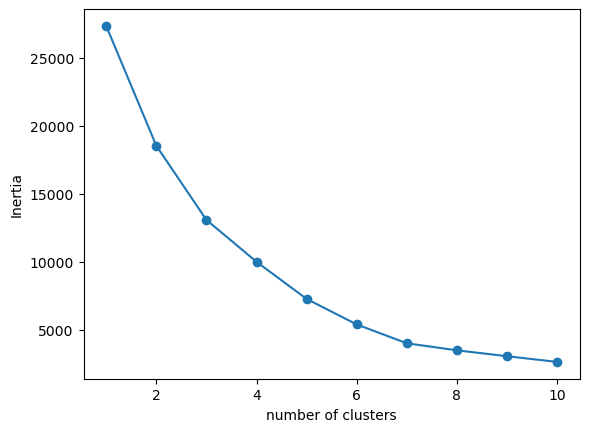

In [12]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, n_init=10)
    km.fit(dfX_scaled)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker="o")
plt.xlabel("number of clusters")
plt.ylabel("Inertia")
plt.show()

### 10. dfX_scaledにクラス数４。

In [13]:
n_cls = 4
km = KMeans(n_clusters=n_cls, n_init=10, random_state=5)
cls = km.fit_predict(dfX_scaled)
print(cls)

[1 2 1 ... 2 2 2]


### 11. df_50にcluster_noを追加,

In [14]:
df_50["cluster_no"] = cls
display(df_50.head())

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名,性別,年代,cluster_no
0,17,1,12,1984,110,110,1,19,菓子,1912,ゼリー・プリン,191211,ゼリー,2,50,1
1,17,1,12,1984,350,350,1,18,惣菜,1813,弁当,181313,米飯惣菜,2,50,2
2,17,1,12,1984,55,55,1,19,菓子,1916,乾菓子,191620,米菓,2,50,1
3,17,1,12,1984,85,85,1,20,飲料,2012,清涼飲料,201215,茶系飲料,2,50,1
4,17,1,12,1984,110,110,1,19,菓子,1915,生菓子,191512,洋風生菓子,2,50,1


### 12.出現数を表示

In [15]:
print(df_50["cluster_no"].value_counts())

cluster_no
1    9467
2    3575
0     463
3     179
Name: count, dtype: int64


### 13. df_50の個数を横、税抜き価格を縦にして散布図を表示、

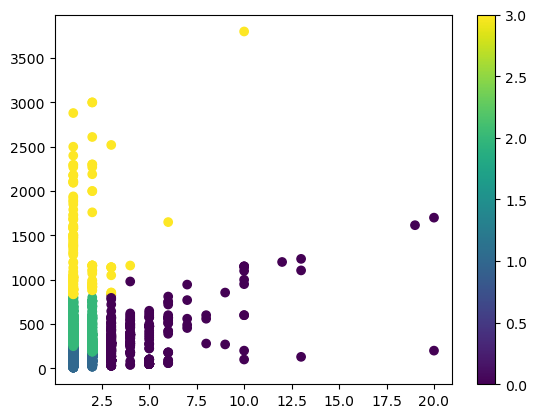

In [16]:
plt.scatter(df_50["個数"], df_50["税抜価格"], marker="o", c=df_50["cluster_no"])

plt.colorbar()
plt.xlabel("")
plt.ylabel("")
plt.show()